In [1]:
import numpy as np
import potential_profile
reload(potential_profile)
import matplotlib.pyplot as plt
%matplotlib inline
%pdb

Automatic pdb calling has been turned ON


In [ ]:
import classify_tf
reload(classify_tf)

N_grid = 100
x = np.linspace(-1,1,N_grid)

# dot parameters
d = (500e-3,0,0.1,1)
b1 = (-400e-3,-0.3,0.1,1)
b2 = (-400e-3,0.3,0.1,1)

V = potential_profile.single_dot_V_x_wire(x,d,b1,b2)
K = classify_tf.create_K_matrix(x,E_scale=0e-3,sigma=(x[1] - x[0]))
#K = np.identity(len(x))

mu_v = 200e-3

# some trial value
C_k = 1

N_dot = [4]

n,mu_d,mask = classify_tf.solve_tf(V,K,C_k,N_dot,mu_v)

dot_info = classify_tf.get_dot_info(mask)
N_c = classify_tf.get_dot_charges(n,dot_info)
print "Number of electrons on dot",N_c

print "Dot_potential",mu_d
plot_mask(mask,1,x,V,mu_v)

plt.figure(2)
plt.plot(x,n)
plt.xlabel('x')
plt.ylabel('electron density')

> /Users/sandesh/quantum-ml/dot_classifier_tf/classify_tf.py(182)solve_tf()
-> prelim_mask = map(lambda x : 'd' if x > 0.0 else 'b',n)
(Pdb) p n
array([ 0.03115207,  0.02902517,  0.02688884,  0.02474551,  0.02259822,
        0.02045078,  0.01830797,  0.01617586,  0.01406213,  0.01197665,
        0.0099322 ,  0.00794566,  0.00603981,  0.00424641,  0.0026121 ,
        0.00121215,  0.00019796,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00625031,  0.02009509,  0.03818651,
        0.05909711,  0.08129466,  0.10259651,  0.11994319,  0.12985829,
        0.12985829,  0.11994319,  0.10259651,  0.08129466,  0.05909711,
        0.03818651,  0.02009509,  0.00625031,  0.        ,  0. 

In [2]:
def plot_mask(mask,fig_no,x,V,mu_l):
    leads = [i for i, ele in enumerate(mask) if ele == 'l']
    barrier = [i for i, ele in enumerate(mask) if ele == 'b']
    dots = [i for i, ele in enumerate(mask) if ele == 'd']

    plt.figure(fig_no)
    plt.scatter(x[dots],V[dots],color='b')
    plt.plot(x,mu_l*np.ones(len(x)),color='c',label='mu_lead')
    plt.scatter(x[barrier],V[barrier],color='r')
    plt.scatter(x[leads],V[leads],color='c')
    plt.legend(('mu_lead','Island','Barrier','Leads'))
    plt.xlabel('x',fontsize=16)
    plt.ylabel('V(x)',fontsize=16)
    plt.title(r'$\mu_{lead}$ = ' + str(mu_l),fontsize=16)

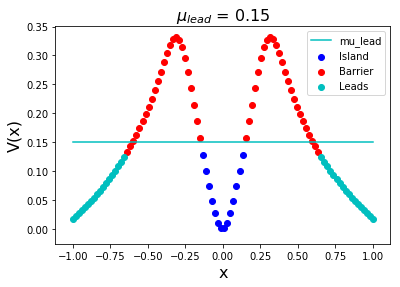

In [ ]:
dot